In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Best Agents PvP

The sections following this justify each learners inclusion. Also, the graphics used to create report visuals are contained below.

In [79]:
def flatten_and_smooth_truncate(dat, N,K):
    # Average across replications
    dat = dat.values[:,0:K]
    datmeans = np.mean(dat, axis=0)
    datmeans = datmeans[~np.isnan(datmeans)]
    
    # Moving average smoothing
    return(np.convolve(datmeans, np.ones((N,))/N, mode='valid'))

In [55]:
qvq = pd.read_csv('../final/PvP/winsbest_QVSbest_Q2020_12_15.csv', header=None, names=np.arange(25000))
qvqt = pd.read_csv('../final/PvP/winsbest_QVSbest_Qt2020_12_15.csv', header=None, names=np.arange(25000))
qvb = pd.read_csv('../final/PvP/winsbest_QVSbest_Bayes2020_12_15.csv', header=None, names=np.arange(25000))
qvr = pd.read_csv('../final/PvP/winsbest_QVSbest_random2020_12_15.csv', header=None, names=np.arange(25000))

In [66]:
qtvq = pd.read_csv('../final/PvP/winsbest_QtVSbest_Q2020_12_15.csv', header=None, names=np.arange(25000))
qtvqt = pd.read_csv('../final/PvP/winsbest_QtVSbest_Qt2020_12_15.csv', header=None, names=np.arange(25000))
qtvb = pd.read_csv('../final/PvP/winsbest_QtVSbest_Bayes2020_12_15.csv', header=None, names=np.arange(25000))
qtvr = pd.read_csv('../final/PvP/winsbest_QtVSbest_random2020_12_15.csv', header=None, names=np.arange(25000))

In [64]:
bvq = pd.read_csv('../final/PvP/winsbest_BayesVSbest_Q2020_12_15.csv', header=None, names=np.arange(25000))
bvqt = pd.read_csv('../final/PvP/winsbest_BayesVSbest_Qt2020_12_15.csv', header=None, names=np.arange(25000))
bvb = pd.read_csv('../final/PvP/winsbest_BayesVSbest_Bayes2020_12_15.csv', header=None, names=np.arange(25000))
bvr = pd.read_csv('../final/PvP/winsbest_BayesVSbest_random2020_12_15.csv', header=None, names=np.arange(25000))

In [96]:
N = 50
K = 10000
q_avg = np.zeros([4, 25000])
q_avg[0,:] = np.mean(qvq, axis=0)
q_avg[1,:] = np.mean(qvqt,axis=0)
q_avg[2,:] = np.mean(qvb, axis=0)
q_avg[3,:] = np.mean(qvr, axis=0)
q_avg_all = np.convolve(np.mean(q_avg, axis=0), np.ones((N,))/N, mode='valid')[0:K]

qt_avg = np.zeros([4, 25000])
qt_avg[0,:] = np.mean(qtvq, axis=0)
qt_avg[1,:] = np.mean(qtvqt,axis=0)
qt_avg[2,:] = np.mean(qtvb, axis=0)
qt_avg[3,:] = np.mean(qtvr, axis=0)
qt_avg_all = np.convolve(np.mean(qt_avg, axis=0), np.ones((N,))/N, mode='valid')[0:K]

b_avg = np.zeros([4, 25000])
b_avg[0,:] = np.mean(bvq, axis=0)
b_avg[1,:] = np.mean(bvqt,axis=0)
b_avg[2,:] = np.mean(bvb, axis=0)
b_avg[3,:] = np.mean(bvr, axis=0)
b_avg_all = np.convolve(np.mean(b_avg, axis=0), np.ones((N,))/N, mode='valid')[0:K]

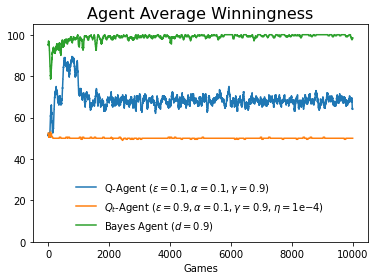

In [142]:
# Plotting
#plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q_avg_all)), 100*q_avg_all, label = r'Q-Agent $(\epsilon = 0.1, \alpha=0.1, \gamma=0.9)$')
plt.plot(np.arange(len(qt_avg_all)), 100*qt_avg_all, label = r'$Q_t$-Agent $(\epsilon = 0.9, \alpha=0.1, \gamma=0.9, \eta=1$e$-4)$')
plt.plot(np.arange(len(b_avg_all)), 100*b_avg_all, label = r'Bayes Agent $(d=0.9)$')

plt.title('Agent Average Winningness',fontsize=16)
plt.xlabel('Games')
plt.ylim((0,105))

plt.legend(loc='lower center', frameon=False)
plt.show()

# Q-learner vs Q-learner

## Epsilon = 0.1

In [109]:
# Reading 
q010101 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.1-0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010103 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.1-0.3vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010105 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.1-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010107 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.1-0.7vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010109 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.1-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [110]:
q010301 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.3-0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010303 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.3-0.3vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010305 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.3-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010307 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.3-0.7vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010309 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.3-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [111]:
q010501 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.5-0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010503 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.5-0.3vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010505 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.5-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010507 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.5-0.7vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010509 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.5-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [112]:
q010701 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.7-0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010703 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.7-0.3vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010705 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.7-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010707 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.7-0.7vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010709 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.7-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [113]:
q010901 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.9-0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010903 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.9-0.3vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010905 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.9-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010907 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.9-0.7vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
q010909 = pd.read_csv('../final/QvQ/QvQ_optimal_moves0.10.9-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [114]:
def flatten_and_smooth(dat, N):
    # Average across replications
    dat = dat.values 
    datmeans = np.mean(dat, axis=0)
    datmeans = datmeans[~np.isnan(datmeans)]
    
    # Moving average smoothing
    return(np.convolve(datmeans, np.ones((N,))/N, mode='valid'))

In [115]:
N = 500
q010101moving_avg = flatten_and_smooth(q010101, N)
q010103moving_avg = flatten_and_smooth(q010103, N)
q010105moving_avg = flatten_and_smooth(q010105, N)
q010107moving_avg = flatten_and_smooth(q010107, N)
q010109moving_avg = flatten_and_smooth(q010109, N)


q010301moving_avg = flatten_and_smooth(q010301, N)
q010303moving_avg = flatten_and_smooth(q010303, N)
q010305moving_avg = flatten_and_smooth(q010305, N)
q010307moving_avg = flatten_and_smooth(q010307, N)
q010309moving_avg = flatten_and_smooth(q010309, N)

q010501moving_avg = flatten_and_smooth(q010501, N)
q010503moving_avg = flatten_and_smooth(q010503, N)
q010505moving_avg = flatten_and_smooth(q010505, N)
q010507moving_avg = flatten_and_smooth(q010507, N)
q010509moving_avg = flatten_and_smooth(q010509, N)

q010701moving_avg = flatten_and_smooth(q010701, N)
q010703moving_avg = flatten_and_smooth(q010703, N)
q010705moving_avg = flatten_and_smooth(q010705, N)
q010707moving_avg = flatten_and_smooth(q010707, N)
q010709moving_avg = flatten_and_smooth(q010709, N)

q010901moving_avg = flatten_and_smooth(q010901, N)
q010903moving_avg = flatten_and_smooth(q010903, N)
q010905moving_avg = flatten_and_smooth(q010905, N)
q010907moving_avg = flatten_and_smooth(q010907, N)
q010909moving_avg = flatten_and_smooth(q010909, N)

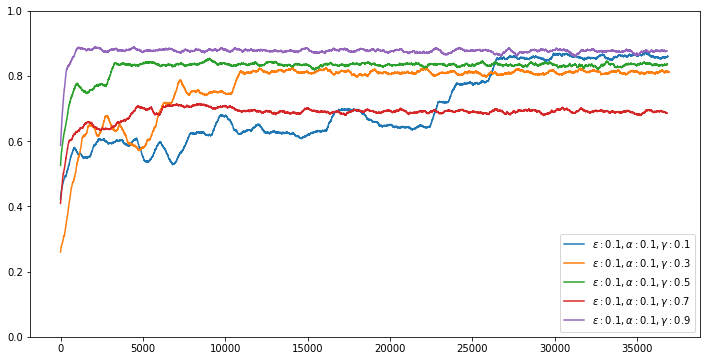

In [116]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q010101moving_avg)), q010101moving_avg, label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.1 $')
plt.plot(np.arange(len(q010103moving_avg)), q010103moving_avg, label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.3 $')
plt.plot(np.arange(len(q010105moving_avg)), q010105moving_avg, label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.5 $')
plt.plot(np.arange(len(q010107moving_avg)), q010107moving_avg, label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.7 $')
plt.plot(np.arange(len(q010109moving_avg)), q010109moving_avg, label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

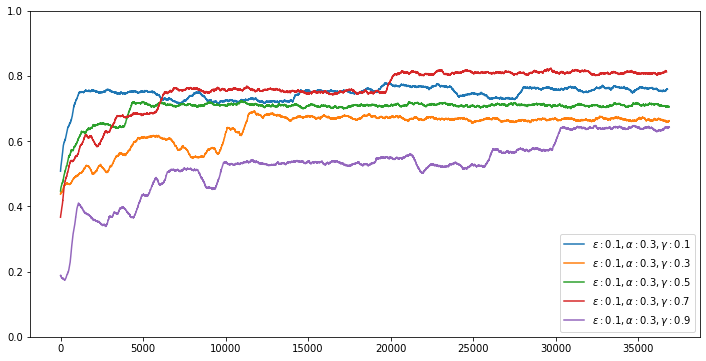

In [117]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q010301moving_avg)), q010301moving_avg, label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.1 $')
plt.plot(np.arange(len(q010303moving_avg)), q010303moving_avg, label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.3 $')
plt.plot(np.arange(len(q010305moving_avg)), q010305moving_avg, label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.5 $')
plt.plot(np.arange(len(q010307moving_avg)), q010307moving_avg, label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.7 $')
plt.plot(np.arange(len(q010309moving_avg)), q010309moving_avg, label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

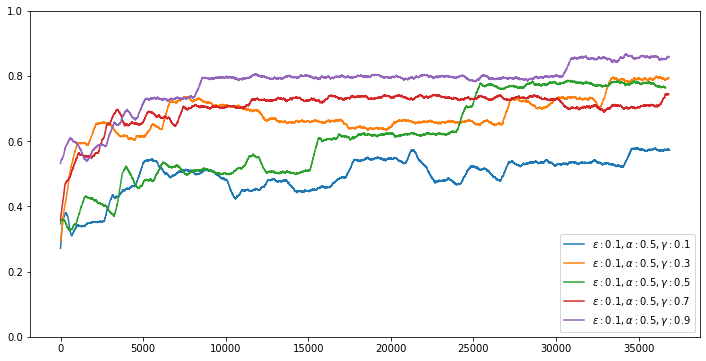

In [118]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q010501moving_avg)), q010501moving_avg, label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.1 $')
plt.plot(np.arange(len(q010503moving_avg)), q010503moving_avg, label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.3 $')
plt.plot(np.arange(len(q010505moving_avg)), q010505moving_avg, label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.5 $')
plt.plot(np.arange(len(q010507moving_avg)), q010507moving_avg, label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.7 $')
plt.plot(np.arange(len(q010509moving_avg)), q010509moving_avg, label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

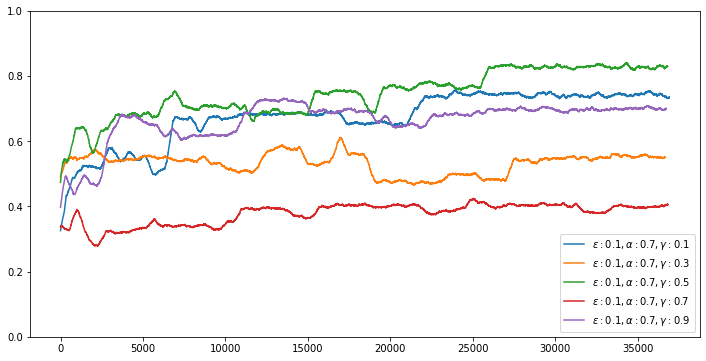

In [119]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q010701moving_avg)), q010701moving_avg, label = r'$\epsilon:0.1, \alpha:0.7, \gamma:0.1 $')
plt.plot(np.arange(len(q010703moving_avg)), q010703moving_avg, label = r'$\epsilon:0.1, \alpha:0.7, \gamma:0.3 $')
plt.plot(np.arange(len(q010705moving_avg)), q010705moving_avg, label = r'$\epsilon:0.1, \alpha:0.7, \gamma:0.5 $')
plt.plot(np.arange(len(q010707moving_avg)), q010707moving_avg, label = r'$\epsilon:0.1, \alpha:0.7, \gamma:0.7 $')
plt.plot(np.arange(len(q010709moving_avg)), q010709moving_avg, label = r'$\epsilon:0.1, \alpha:0.7, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

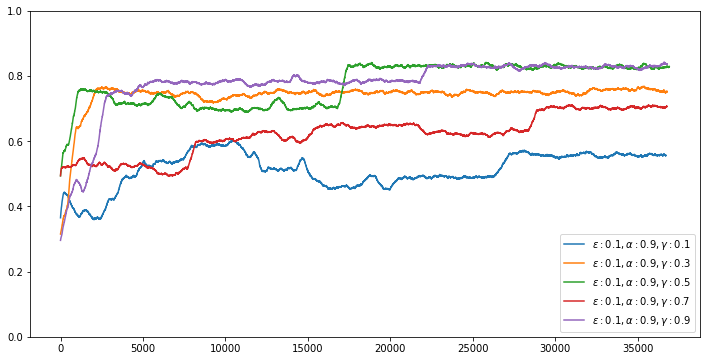

In [120]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q010901moving_avg)), q010901moving_avg, label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.1 $')
plt.plot(np.arange(len(q010903moving_avg)), q010903moving_avg, label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.3 $')
plt.plot(np.arange(len(q010905moving_avg)), q010905moving_avg, label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.5 $')
plt.plot(np.arange(len(q010907moving_avg)), q010907moving_avg, label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.7 $')
plt.plot(np.arange(len(q010909moving_avg)), q010909moving_avg, label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

## Epsilon = 0.3

In [67]:
# Reading 
q030101 = pd.read_csv('final/QvQ/optimal_moves0.30.1-0.1vSelfAll_2020_11_25-17_44_00.csv', header=None, names=np.arange(50000))
q030103 = pd.read_csv('final/QvQ/optimal_moves0.30.1-0.3vSelfAll_2020_11_25-17_46_22.csv', header=None, names=np.arange(50000))
q030105 = pd.read_csv('final/QvQ/optimal_moves0.30.1-0.5vSelfAll_2020_11_25-17_49_17.csv', header=None, names=np.arange(50000))
q030107 = pd.read_csv('final/QvQ/optimal_moves0.30.1-0.7vSelfAll_2020_11_25-17_51_48.csv', header=None, names=np.arange(50000))
q030109 = pd.read_csv('final/QvQ/optimal_moves0.30.1-0.9vSelfAll_2020_11_25-17_54_29.csv', header=None, names=np.arange(50000))

q030301 = pd.read_csv('final/QvQ/optimal_moves0.30.3-0.1vSelfAll_2020_11_25-17_57_21.csv', header=None, names=np.arange(50000))
q030303 = pd.read_csv('final/QvQ/optimal_moves0.30.3-0.3vSelfAll_2020_11_25-18_00_10.csv', header=None, names=np.arange(50000))
q030305 = pd.read_csv('final/QvQ/optimal_moves0.30.3-0.5vSelfAll_2020_11_25-18_02_43.csv', header=None, names=np.arange(50000))
q030307 = pd.read_csv('final/QvQ/optimal_moves0.30.3-0.7vSelfAll_2020_11_25-18_05_15.csv', header=None, names=np.arange(50000))
q030309 = pd.read_csv('final/QvQ/optimal_moves0.30.3-0.9vSelfAll_2020_11_25-18_07_49.csv', header=None, names=np.arange(50000))

q030501 = pd.read_csv('final/QvQ/optimal_moves0.30.5-0.1vSelfAll_2020_11_25-18_10_04.csv', header=None, names=np.arange(50000))
q030503 = pd.read_csv('final/QvQ/optimal_moves0.30.5-0.3vSelfAll_2020_11_25-18_12_20.csv', header=None, names=np.arange(50000))
q030505 = pd.read_csv('final/QvQ/optimal_moves0.30.5-0.5vSelfAll_2020_11_25-18_14_56.csv', header=None, names=np.arange(50000))
q030507 = pd.read_csv('final/QvQ/optimal_moves0.30.5-0.7vSelfAll_2020_11_25-18_17_33.csv', header=None, names=np.arange(50000))
q030509 = pd.read_csv('final/QvQ/optimal_moves0.30.5-0.9vSelfAll_2020_11_25-18_20_21.csv', header=None, names=np.arange(50000))

q030701 = pd.read_csv('final/QvQ/optimal_moves0.30.7-0.1vSelfAll_2020_11_25-18_22_18.csv', header=None, names=np.arange(50000))
q030703 = pd.read_csv('final/QvQ/optimal_moves0.30.7-0.3vSelfAll_2020_11_25-18_24_51.csv', header=None, names=np.arange(50000))
q030705 = pd.read_csv('final/QvQ/optimal_moves0.30.7-0.5vSelfAll_2020_11_25-18_27_00.csv', header=None, names=np.arange(50000))
q030707 = pd.read_csv('final/QvQ/optimal_moves0.30.7-0.7vSelfAll_2020_11_25-18_29_15.csv', header=None, names=np.arange(50000))
q030709 = pd.read_csv('final/QvQ/optimal_moves0.30.7-0.9vSelfAll_2020_11_25-18_31_33.csv', header=None, names=np.arange(50000))

q030901 = pd.read_csv('final/QvQ/optimal_moves0.30.9-0.1vSelfAll_2020_11_25-18_33_51.csv', header=None, names=np.arange(50000))
q030903 = pd.read_csv('final/QvQ/optimal_moves0.30.9-0.3vSelfAll_2020_11_25-18_35_59.csv', header=None, names=np.arange(50000))
q030905 = pd.read_csv('final/QvQ/optimal_moves0.30.9-0.5vSelfAll_2020_11_25-18_38_20.csv', header=None, names=np.arange(50000))
q030907 = pd.read_csv('final/QvQ/optimal_moves0.30.9-0.7vSelfAll_2020_11_25-18_40_29.csv', header=None, names=np.arange(50000))
q030909 = pd.read_csv('final/QvQ/optimal_moves0.30.9-0.9vSelfAll_2020_11_25-18_42_25.csv', header=None, names=np.arange(50000))

In [68]:
q030101moving_avg = flatten_and_smooth(q030101, N)
q030103moving_avg = flatten_and_smooth(q030103, N)
q030105moving_avg = flatten_and_smooth(q030105, N)
q030107moving_avg = flatten_and_smooth(q030107, N)
q030109moving_avg = flatten_and_smooth(q030109, N)

q030301moving_avg = flatten_and_smooth(q030301, N)
q030303moving_avg = flatten_and_smooth(q030303, N)
q030305moving_avg = flatten_and_smooth(q030305, N)
q030307moving_avg = flatten_and_smooth(q030307, N)
q030309moving_avg = flatten_and_smooth(q030309, N)

q030501moving_avg = flatten_and_smooth(q030501, N)
q030503moving_avg = flatten_and_smooth(q030503, N)
q030505moving_avg = flatten_and_smooth(q030505, N)
q030507moving_avg = flatten_and_smooth(q030507, N)
q030509moving_avg = flatten_and_smooth(q030509, N)

q030701moving_avg = flatten_and_smooth(q030701, N)
q030703moving_avg = flatten_and_smooth(q030703, N)
q030705moving_avg = flatten_and_smooth(q030705, N)
q030707moving_avg = flatten_and_smooth(q030707, N)
q030709moving_avg = flatten_and_smooth(q030709, N)

q030901moving_avg = flatten_and_smooth(q030901, N)
q030903moving_avg = flatten_and_smooth(q030903, N)
q030905moving_avg = flatten_and_smooth(q030905, N)
q030907moving_avg = flatten_and_smooth(q030907, N)
q030909moving_avg = flatten_and_smooth(q030909, N)

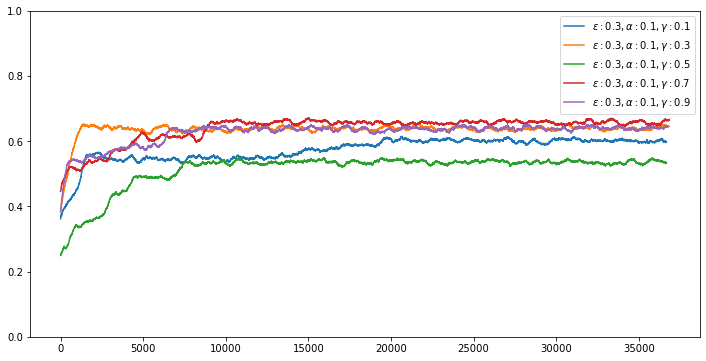

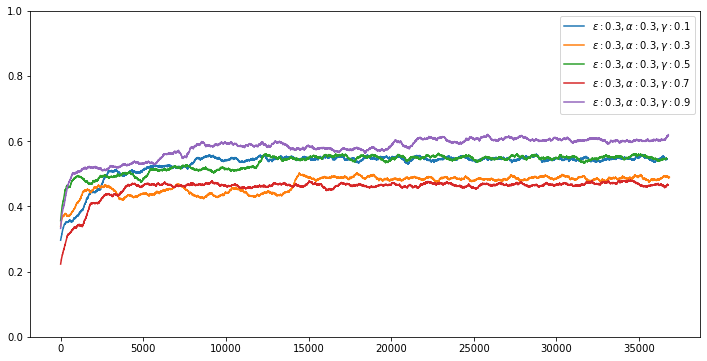

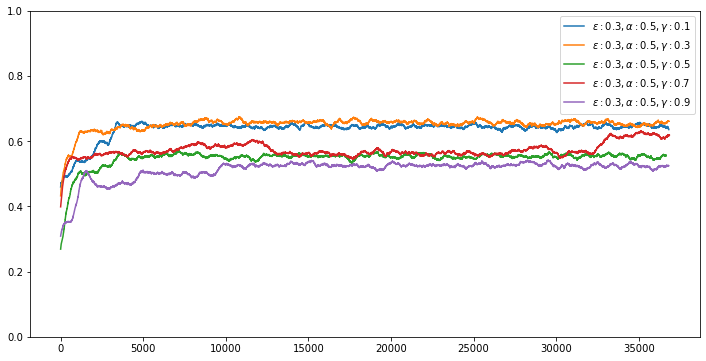

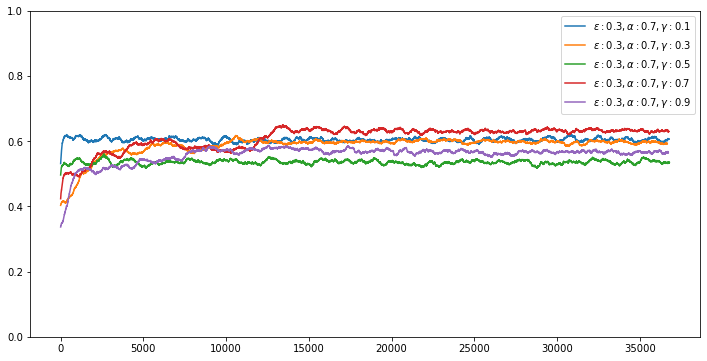

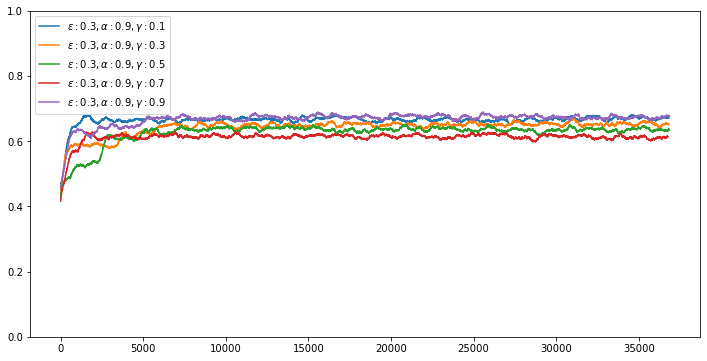

In [69]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q030101moving_avg)), q030101moving_avg, label = r'$\epsilon:0.3, \alpha:0.1, \gamma:0.1 $')
plt.plot(np.arange(len(q030103moving_avg)), q030103moving_avg, label = r'$\epsilon:0.3, \alpha:0.1, \gamma:0.3 $')
plt.plot(np.arange(len(q030105moving_avg)), q030105moving_avg, label = r'$\epsilon:0.3, \alpha:0.1, \gamma:0.5 $')
plt.plot(np.arange(len(q030107moving_avg)), q030107moving_avg, label = r'$\epsilon:0.3, \alpha:0.1, \gamma:0.7 $')
plt.plot(np.arange(len(q030109moving_avg)), q030109moving_avg, label = r'$\epsilon:0.3, \alpha:0.1, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q030301moving_avg)), q030301moving_avg, label = r'$\epsilon:0.3, \alpha:0.3, \gamma:0.1 $')
plt.plot(np.arange(len(q030303moving_avg)), q030303moving_avg, label = r'$\epsilon:0.3, \alpha:0.3, \gamma:0.3 $')
plt.plot(np.arange(len(q030305moving_avg)), q030305moving_avg, label = r'$\epsilon:0.3, \alpha:0.3, \gamma:0.5 $')
plt.plot(np.arange(len(q030307moving_avg)), q030307moving_avg, label = r'$\epsilon:0.3, \alpha:0.3, \gamma:0.7 $')
plt.plot(np.arange(len(q030309moving_avg)), q030309moving_avg, label = r'$\epsilon:0.3, \alpha:0.3, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q030501moving_avg)), q030501moving_avg, label = r'$\epsilon:0.3, \alpha:0.5, \gamma:0.1 $')
plt.plot(np.arange(len(q030503moving_avg)), q030503moving_avg, label = r'$\epsilon:0.3, \alpha:0.5, \gamma:0.3 $')
plt.plot(np.arange(len(q030505moving_avg)), q030505moving_avg, label = r'$\epsilon:0.3, \alpha:0.5, \gamma:0.5 $')
plt.plot(np.arange(len(q030507moving_avg)), q030507moving_avg, label = r'$\epsilon:0.3, \alpha:0.5, \gamma:0.7 $')
plt.plot(np.arange(len(q030509moving_avg)), q030509moving_avg, label = r'$\epsilon:0.3, \alpha:0.5, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q030701moving_avg)), q030701moving_avg, label = r'$\epsilon:0.3, \alpha:0.7, \gamma:0.1 $')
plt.plot(np.arange(len(q030703moving_avg)), q030703moving_avg, label = r'$\epsilon:0.3, \alpha:0.7, \gamma:0.3 $')
plt.plot(np.arange(len(q030705moving_avg)), q030705moving_avg, label = r'$\epsilon:0.3, \alpha:0.7, \gamma:0.5 $')
plt.plot(np.arange(len(q030707moving_avg)), q030707moving_avg, label = r'$\epsilon:0.3, \alpha:0.7, \gamma:0.7 $')
plt.plot(np.arange(len(q030709moving_avg)), q030709moving_avg, label = r'$\epsilon:0.3, \alpha:0.7, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q030901moving_avg)), q030901moving_avg, label = r'$\epsilon:0.3, \alpha:0.9, \gamma:0.1 $')
plt.plot(np.arange(len(q030903moving_avg)), q030903moving_avg, label = r'$\epsilon:0.3, \alpha:0.9, \gamma:0.3 $')
plt.plot(np.arange(len(q030905moving_avg)), q030905moving_avg, label = r'$\epsilon:0.3, \alpha:0.9, \gamma:0.5 $')
plt.plot(np.arange(len(q030907moving_avg)), q030907moving_avg, label = r'$\epsilon:0.3, \alpha:0.9, \gamma:0.7 $')
plt.plot(np.arange(len(q030909moving_avg)), q030909moving_avg, label = r'$\epsilon:0.3, \alpha:0.9, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

## Epsilon = 0.7

Just to show that this is only interesting for epsilon = 0.1

In [70]:
# Reading 
q070101 = pd.read_csv('final/QvQ/optimal_moves0.70.1-0.1vSelfAll_2020_11_25-19_58_11.csv', header=None, names=np.arange(50000))
q070103 = pd.read_csv('final/QvQ/optimal_moves0.70.1-0.3vSelfAll_2020_11_25-20_01_31.csv', header=None, names=np.arange(50000))
q070105 = pd.read_csv('final/QvQ/optimal_moves0.70.1-0.5vSelfAll_2020_11_25-20_05_04.csv', header=None, names=np.arange(50000))
q070107 = pd.read_csv('final/QvQ/optimal_moves0.70.1-0.7vSelfAll_2020_11_25-20_08_56.csv', header=None, names=np.arange(50000))
q070109 = pd.read_csv('final/QvQ/optimal_moves0.70.1-0.9vSelfAll_2020_11_25-20_12_40.csv', header=None, names=np.arange(50000))

q070301 = pd.read_csv('final/QvQ/optimal_moves0.70.3-0.1vSelfAll_2020_11_25-20_16_22.csv', header=None, names=np.arange(50000))
q070303 = pd.read_csv('final/QvQ/optimal_moves0.70.3-0.3vSelfAll_2020_11_25-20_20_08.csv', header=None, names=np.arange(50000))
q070305 = pd.read_csv('final/QvQ/optimal_moves0.70.3-0.5vSelfAll_2020_11_25-20_24_24.csv', header=None, names=np.arange(50000))
q070307 = pd.read_csv('final/QvQ/optimal_moves0.70.3-0.7vSelfAll_2020_11_25-20_28_21.csv', header=None, names=np.arange(50000))
q070309 = pd.read_csv('final/QvQ/optimal_moves0.70.3-0.9vSelfAll_2020_11_25-20_32_41.csv', header=None, names=np.arange(50000))

q070501 = pd.read_csv('final/QvQ/optimal_moves0.70.5-0.1vSelfAll_2020_11_25-20_37_04.csv', header=None, names=np.arange(50000))
q070503 = pd.read_csv('final/QvQ/optimal_moves0.70.5-0.3vSelfAll_2020_11_25-20_41_07.csv', header=None, names=np.arange(50000))
q070505 = pd.read_csv('final/QvQ/optimal_moves0.70.5-0.5vSelfAll_2020_11_25-20_44_51.csv', header=None, names=np.arange(50000))
q070507 = pd.read_csv('final/QvQ/optimal_moves0.70.5-0.7vSelfAll_2020_11_25-20_47_55.csv', header=None, names=np.arange(50000))
q070509 = pd.read_csv('final/QvQ/optimal_moves0.70.5-0.9vSelfAll_2020_11_25-20_51_14.csv', header=None, names=np.arange(50000))

q070701 = pd.read_csv('final/QvQ/optimal_moves0.70.7-0.1vSelfAll_2020_11_25-20_54_20.csv', header=None, names=np.arange(50000))
q070703 = pd.read_csv('final/QvQ/optimal_moves0.70.7-0.3vSelfAll_2020_11_25-20_58_28.csv', header=None, names=np.arange(50000))
q070705 = pd.read_csv('final/QvQ/optimal_moves0.70.7-0.5vSelfAll_2020_11_25-21_01_34.csv', header=None, names=np.arange(50000))
q070707 = pd.read_csv('final/QvQ/optimal_moves0.70.7-0.7vSelfAll_2020_11_25-21_05_59.csv', header=None, names=np.arange(50000))
q070709 = pd.read_csv('final/QvQ/optimal_moves0.70.7-0.9vSelfAll_2020_11_25-21_09_43.csv', header=None, names=np.arange(50000))

q070901 = pd.read_csv('final/QvQ/optimal_moves0.70.9-0.1vSelfAll_2020_11_25-21_13_03.csv', header=None, names=np.arange(50000))
q070903 = pd.read_csv('final/QvQ/optimal_moves0.70.9-0.3vSelfAll_2020_11_25-21_17_23.csv', header=None, names=np.arange(50000))
q070905 = pd.read_csv('final/QvQ/optimal_moves0.70.9-0.5vSelfAll_2020_11_25-21_20_27.csv', header=None, names=np.arange(50000))
q070907 = pd.read_csv('final/QvQ/optimal_moves0.70.9-0.7vSelfAll_2020_11_25-21_24_56.csv', header=None, names=np.arange(50000))
q070909 = pd.read_csv('final/QvQ/optimal_moves0.70.9-0.9vSelfAll_2020_11_25-21_28_08.csv', header=None, names=np.arange(50000))

In [71]:
q070101moving_avg = flatten_and_smooth(q070101, N)
q070103moving_avg = flatten_and_smooth(q070103, N)
q070105moving_avg = flatten_and_smooth(q070105, N)
q070107moving_avg = flatten_and_smooth(q070107, N)
q070109moving_avg = flatten_and_smooth(q070109, N)

q070301moving_avg = flatten_and_smooth(q070301, N)
q070303moving_avg = flatten_and_smooth(q070303, N)
q070305moving_avg = flatten_and_smooth(q070305, N)
q070307moving_avg = flatten_and_smooth(q070307, N)
q070309moving_avg = flatten_and_smooth(q070309, N)

q070501moving_avg = flatten_and_smooth(q070501, N)
q070503moving_avg = flatten_and_smooth(q070503, N)
q070505moving_avg = flatten_and_smooth(q070505, N)
q070507moving_avg = flatten_and_smooth(q070507, N)
q070509moving_avg = flatten_and_smooth(q070509, N)

q070701moving_avg = flatten_and_smooth(q070701, N)
q070703moving_avg = flatten_and_smooth(q070703, N)
q070705moving_avg = flatten_and_smooth(q070705, N)
q070707moving_avg = flatten_and_smooth(q070707, N)
q070709moving_avg = flatten_and_smooth(q070709, N)

q070901moving_avg = flatten_and_smooth(q070901, N)
q070903moving_avg = flatten_and_smooth(q070903, N)
q070905moving_avg = flatten_and_smooth(q070905, N)
q070907moving_avg = flatten_and_smooth(q070907, N)
q070909moving_avg = flatten_and_smooth(q070909, N)

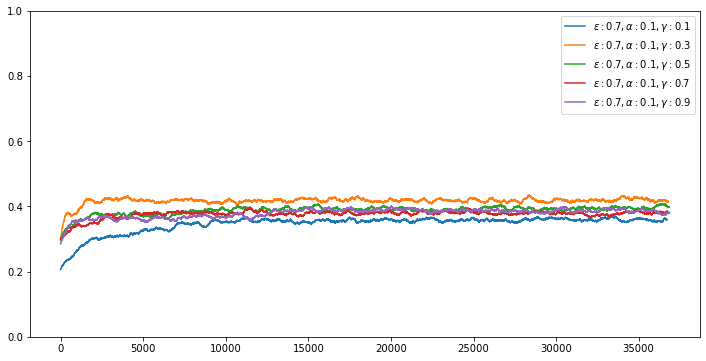

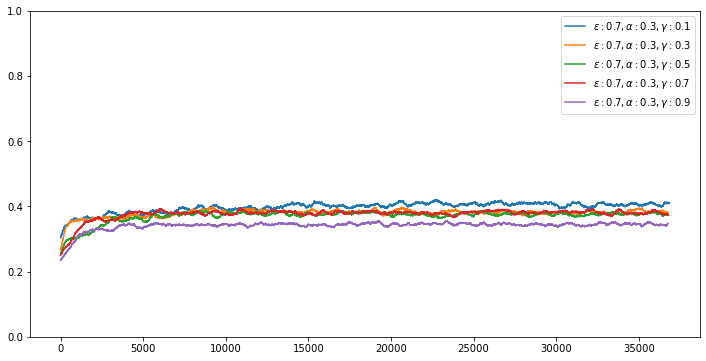

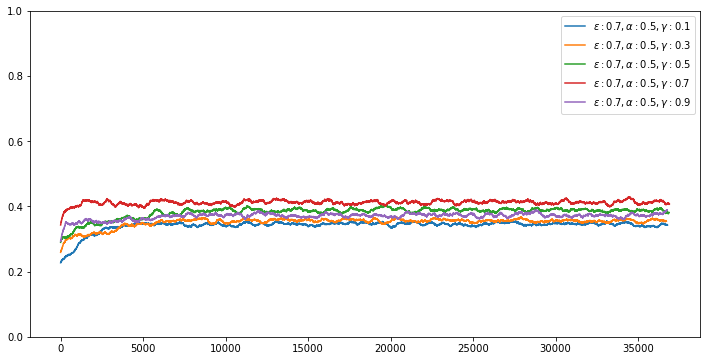

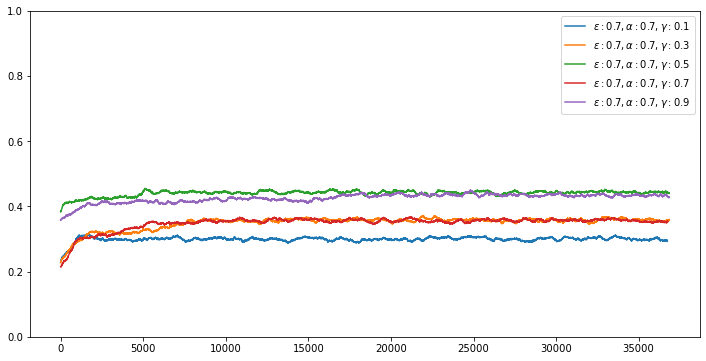

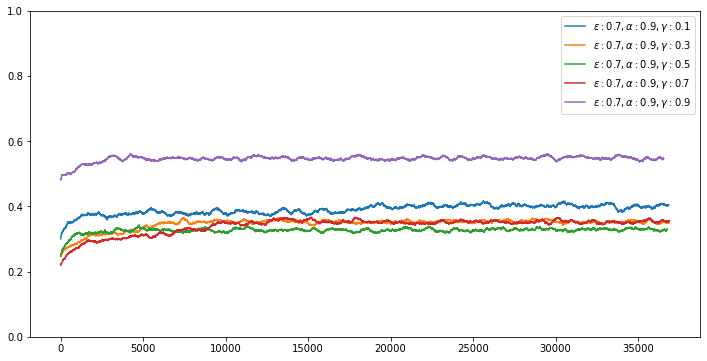

In [72]:
# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q070101moving_avg)), q070101moving_avg, label = r'$\epsilon:0.7, \alpha:0.1, \gamma:0.1 $')
plt.plot(np.arange(len(q070103moving_avg)), q070103moving_avg, label = r'$\epsilon:0.7, \alpha:0.1, \gamma:0.3 $')
plt.plot(np.arange(len(q070105moving_avg)), q070105moving_avg, label = r'$\epsilon:0.7, \alpha:0.1, \gamma:0.5 $')
plt.plot(np.arange(len(q070107moving_avg)), q070107moving_avg, label = r'$\epsilon:0.7, \alpha:0.1, \gamma:0.7 $')
plt.plot(np.arange(len(q070109moving_avg)), q070109moving_avg, label = r'$\epsilon:0.7, \alpha:0.1, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q070301moving_avg)), q070301moving_avg, label = r'$\epsilon:0.7, \alpha:0.3, \gamma:0.1 $')
plt.plot(np.arange(len(q070303moving_avg)), q070303moving_avg, label = r'$\epsilon:0.7, \alpha:0.3, \gamma:0.3 $')
plt.plot(np.arange(len(q070305moving_avg)), q070305moving_avg, label = r'$\epsilon:0.7, \alpha:0.3, \gamma:0.5 $')
plt.plot(np.arange(len(q070307moving_avg)), q070307moving_avg, label = r'$\epsilon:0.7, \alpha:0.3, \gamma:0.7 $')
plt.plot(np.arange(len(q070309moving_avg)), q070309moving_avg, label = r'$\epsilon:0.7, \alpha:0.3, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q070501moving_avg)), q070501moving_avg, label = r'$\epsilon:0.7, \alpha:0.5, \gamma:0.1 $')
plt.plot(np.arange(len(q070503moving_avg)), q070503moving_avg, label = r'$\epsilon:0.7, \alpha:0.5, \gamma:0.3 $')
plt.plot(np.arange(len(q070505moving_avg)), q070505moving_avg, label = r'$\epsilon:0.7, \alpha:0.5, \gamma:0.5 $')
plt.plot(np.arange(len(q070507moving_avg)), q070507moving_avg, label = r'$\epsilon:0.7, \alpha:0.5, \gamma:0.7 $')
plt.plot(np.arange(len(q070509moving_avg)), q070509moving_avg, label = r'$\epsilon:0.7, \alpha:0.5, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q070701moving_avg)), q070701moving_avg, label = r'$\epsilon:0.7, \alpha:0.7, \gamma:0.1 $')
plt.plot(np.arange(len(q070703moving_avg)), q070703moving_avg, label = r'$\epsilon:0.7, \alpha:0.7, \gamma:0.3 $')
plt.plot(np.arange(len(q070705moving_avg)), q070705moving_avg, label = r'$\epsilon:0.7, \alpha:0.7, \gamma:0.5 $')
plt.plot(np.arange(len(q070707moving_avg)), q070707moving_avg, label = r'$\epsilon:0.7, \alpha:0.7, \gamma:0.7 $')
plt.plot(np.arange(len(q070709moving_avg)), q070709moving_avg, label = r'$\epsilon:0.7, \alpha:0.7, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

# Plotting
plt.figure(figsize=[12,6])

plt.plot(np.arange(len(q070901moving_avg)), q070901moving_avg, label = r'$\epsilon:0.7, \alpha:0.9, \gamma:0.1 $')
plt.plot(np.arange(len(q070903moving_avg)), q070903moving_avg, label = r'$\epsilon:0.7, \alpha:0.9, \gamma:0.3 $')
plt.plot(np.arange(len(q070905moving_avg)), q070905moving_avg, label = r'$\epsilon:0.7, \alpha:0.9, \gamma:0.5 $')
plt.plot(np.arange(len(q070907moving_avg)), q070907moving_avg, label = r'$\epsilon:0.7, \alpha:0.9, \gamma:0.7 $')
plt.plot(np.arange(len(q070909moving_avg)), q070909moving_avg, label = r'$\epsilon:0.7, \alpha:0.9, \gamma:0.9 $')

plt.ylim((0,1))
plt.legend()
plt.show()

## Conclusions

The best learners are 

\begin{itemize}
    \item 01 01 09
    \item 01 05 09
    \item 01 09 05
\end{itemize}

Inspecting their optimal plays and win rates (when first player) over the first 10,000 such games, we attempt to differentiate their performance.

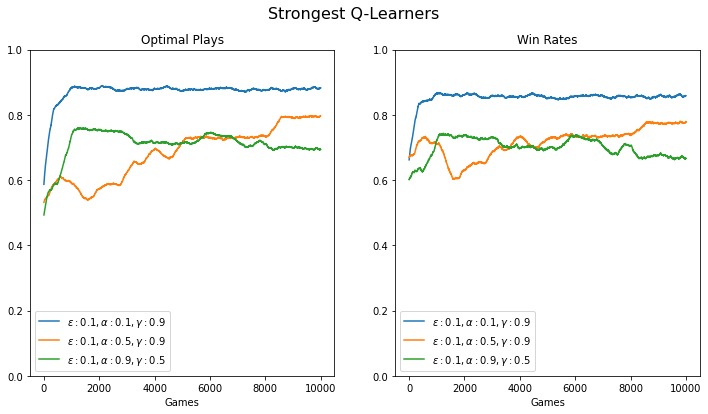

In [123]:
qwin010109 = pd.read_csv('../final/QvQ/QvQ_wins0.10.1-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qwin010509 = pd.read_csv('../final/QvQ/QvQ_wins0.10.5-0.9vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qwin010905 = pd.read_csv('../final/QvQ/QvQ_wins0.10.9-0.5vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qwin010109moving_avg = flatten_and_smooth(qwin010109, N)
qwin010509moving_avg = flatten_and_smooth(qwin010509, N)
qwin010905moving_avg = flatten_and_smooth(qwin010905, N)


# Plotting Optimal Plays
plt.figure(figsize=[12,6])
plt.suptitle('Strongest Q-Learners',fontsize=16)

plt.subplot(1,2,1)
plt.plot(np.arange(10000), q010109moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9 $')
plt.plot(np.arange(10000), q010509moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.9 $')
plt.plot(np.arange(10000), q010905moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.5 $')

plt.ylim((0,1))

plt.xlabel('Games')
plt.title('Optimal Plays')
plt.legend()


# Plotting Win Rate
plt.subplot(1,2,2)
plt.plot(np.arange(10000), qwin010109moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9 $')
plt.plot(np.arange(10000), qwin010509moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.5, \gamma:0.9 $')
plt.plot(np.arange(10000), qwin010905moving_avg[0:10000], label = r'$\epsilon:0.1, \alpha:0.9, \gamma:0.5 $')

plt.xlabel('Games')
plt.ylim((0,1))
plt.title('Win Rates')
plt.legend()
plt.show()

In both, we have evidence that 01 01 09 is the fastest and most consistent learner.

We also see that - overall - for a given $\epsilon$, the best $\alpha, \gamma$ combination acheives a $1-\epsilon$ percent perfect move. This is expected and suggests a better learning where $\epsilon \rightarrow 0$.

# Visualizing Q-Agent Backprop

Q table was stored for agent with gamma = 0.1 and gamma =0.9.

In [2]:
q01series = pd.read_csv('../final/Q_vis/conservative_series.csv').values
q09series = pd.read_csv('../final/Q_vis/aggressive_series.csv').values

In [3]:
def fill_in_Q(Q, values):
    # awkward to do by hand, but we only need to fill in 18 values
    Q[0,0] = values[0]
    Q[1,0] = values[1]
    Q[1,1] = values[2]
    Q[2,0] = values[3]
    
    Q[3,1] = values[4]
    Q[3,3] = values[5]
    Q[4,2] = values[6]
    Q[4,3] = values[7]
    Q[4,4] = values[8]
    
    Q[5,0] = values[9]
    Q[5,3] = values[10]
    Q[6,1] = values[11]
    Q[6,4] = values[12]
    Q[6,6] = values[13]
    
    Q[7,2] = values[14]
    Q[7,5] = values[15]
    Q[7,6] = values[16]
    Q[7,7] = values[17]
    
    return(Q)
    
    
before = ['[0,1]', '[0,2]', '[1,0]', '[1,1]', '[1,2]', '[2,0]', '[2,1]', '[2,2]']
after = ['[0,0]', '[0,1]', '[0,2]', '[1,0]', '[1,1]', '[1,2]', '[2,0]', '[2,1]']

def tile_image(Q, ax):
    plot = ax.imshow(Q, cmap='coolwarm', vmin=-1, vmax=1)

    ax.set_xticks(np.arange(Q.shape[1]))
    ax.set_yticks(np.arange(Q.shape[0]))

    ax.set_xticklabels(after)
    ax.set_yticklabels(before)
    
    for i in range(Q.shape[0]):
        for j in range(Q.shape[1]):
            text = ax.text(j, i, np.round(Q[i, j],2),ha='center', va='center', color="w")

    return plot

In [4]:
Q01_1 = np.zeros([8,8])
Q01_2 = np.zeros([8,8])
Q01_3 = np.zeros([8,8])
Q01_4 = np.zeros([8,8])

Q01_1 = fill_in_Q(Q01_1, q01series[0,:])
Q01_2 = fill_in_Q(Q01_2, q01series[1,:])
Q01_3 = fill_in_Q(Q01_3, q01series[999,:])
Q01_4 = fill_in_Q(Q01_4, q01series[49999,:])

Q09_1 = np.zeros([8,8])
Q09_2 = np.zeros([8,8])
Q09_3 = np.zeros([8,8])
Q09_4 = np.zeros([8,8])

Q09_1 = fill_in_Q(Q09_1, q09series[0,:])
Q09_2 = fill_in_Q(Q09_2, q09series[1,:])
Q09_3 = fill_in_Q(Q09_3, q09series[999,:])
Q09_4 = fill_in_Q(Q09_4, q09series[49999,:])

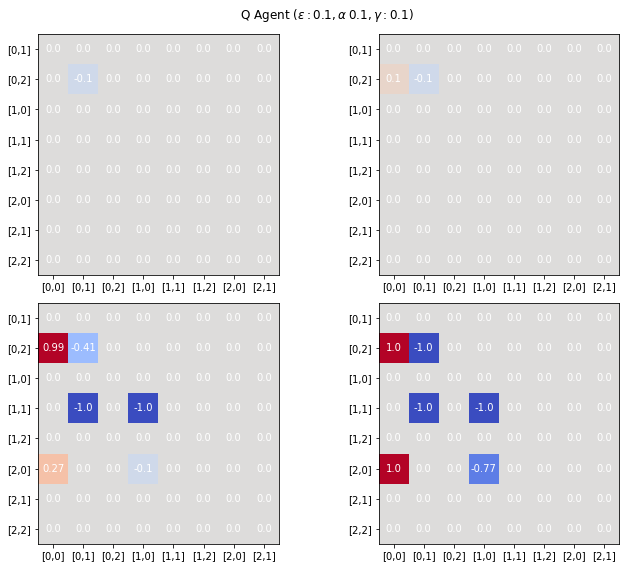

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

im1 = tile_image(Q01_1, ax=ax1)

im2 = tile_image(Q01_2, ax=ax2)

im3 = tile_image(Q01_3, ax=ax3)

im4 = tile_image(Q01_4, ax=ax4)

plt.suptitle(r'Q Agent $(\epsilon:0.1, \alpha\:0.1, \gamma:0.1)$')
plt.tight_layout()

plt.show()

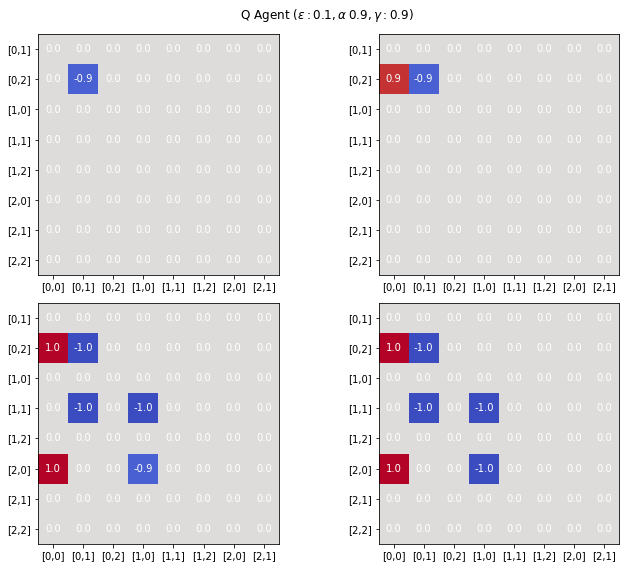

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

im1 = tile_image(Q09_1, ax=ax1)

im2 = tile_image(Q09_2, ax=ax2)

im3 = tile_image(Q09_3, ax=ax3)

im4 = tile_image(Q09_4, ax=ax4)

plt.suptitle(r'Q Agent $(\epsilon:0.1, \alpha\:0.9, \gamma:0.9)$')
plt.tight_layout()
plt.show()

# Epsilon -> 0

In [288]:
eta = 0.000
x = np.linspace(0,5000,100)
y = 0.3*np.exp(-eta*x)

In [23]:
qt001_010105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_010109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_010305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_010309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt001_050105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_050109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_050305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_050309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt001_090105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_090109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_090305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.50.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt001_090309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.90.001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [26]:
N = 500
qt001_010105_avg = flatten_and_smooth(qt001_010105, N)
qt001_010109_avg = flatten_and_smooth(qt001_010109, N)
qt001_010305_avg = flatten_and_smooth(qt001_010305, N)
qt001_010309_avg = flatten_and_smooth(qt001_010309, N)

qt001_050105_avg = flatten_and_smooth(qt001_050105, N)
qt001_050109_avg = flatten_and_smooth(qt001_050109, N)
qt001_050305_avg = flatten_and_smooth(qt001_050305, N)
qt001_050309_avg = flatten_and_smooth(qt001_050309, N)

qt001_090105_avg = flatten_and_smooth(qt001_090105, N)
qt001_090109_avg = flatten_and_smooth(qt001_090109, N)
qt001_090305_avg = flatten_and_smooth(qt001_090305, N)
qt001_090309_avg = flatten_and_smooth(qt001_090309, N)

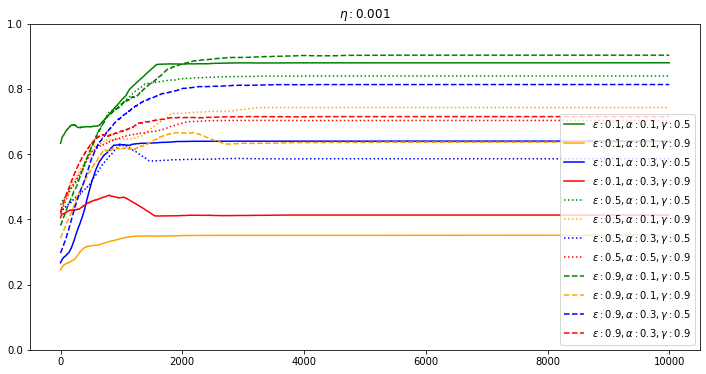

In [27]:
plt.figure(figsize=[12,6])
K = 10000
X = np.arange(K)
plt.title(r'$\eta:0.001$')
plt.plot(X, qt001_010105_avg[0:K], color='green', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt001_010109_avg[0:K], color='orange', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt001_010305_avg[0:K], color='blue', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt001_010309_avg[0:K], color='red', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt001_050105_avg[0:K], linestyle=':', color='green', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt001_050109_avg[0:K], linestyle=':', color='orange', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt001_050305_avg[0:K], linestyle=':', color='blue', label = r'$\epsilon:0.5, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt001_050309_avg[0:K], linestyle=':', color='red', label = r'$\epsilon:0.5, \alpha:0.5, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt001_090105_avg[0:K], linestyle='--', color='green', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt001_090109_avg[0:K], linestyle='--', color='orange', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt001_090305_avg[0:K], linestyle='--', color='blue', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt001_090309_avg[0:K], linestyle='--', color='red', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.9$')

plt.ylim((0,1))
plt.legend()
plt.show()

In [125]:
qt0001_010105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_010109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_010305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_010309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt0001_050105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_050109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_050305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_050309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt0001_090105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_090109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_090305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.50.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt0001_090309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.90.0001vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [126]:
N = 500
qt0001_010105_avg = flatten_and_smooth(qt0001_010105, N)
qt0001_010109_avg = flatten_and_smooth(qt0001_010109, N)
qt0001_010305_avg = flatten_and_smooth(qt0001_010305, N)
qt0001_010309_avg = flatten_and_smooth(qt0001_010309, N)

qt0001_050105_avg = flatten_and_smooth(qt0001_050105, N)
qt0001_050109_avg = flatten_and_smooth(qt0001_050109, N)
qt0001_050305_avg = flatten_and_smooth(qt0001_050305, N)
qt0001_050309_avg = flatten_and_smooth(qt0001_050309, N)

qt0001_090105_avg = flatten_and_smooth(qt0001_090105, N)
qt0001_090109_avg = flatten_and_smooth(qt0001_090109, N)
qt0001_090305_avg = flatten_and_smooth(qt0001_090305, N)
qt0001_090309_avg = flatten_and_smooth(qt0001_090309, N)

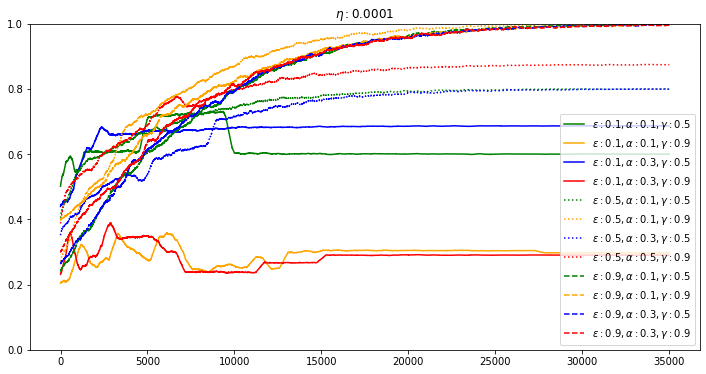

In [127]:
plt.figure(figsize=[12,6])
K = 35000
X = np.arange(K)
plt.title(r'$\eta:0.0001$')
plt.plot(X, qt0001_010105_avg[0:K], color='green', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt0001_010109_avg[0:K], color='orange', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt0001_010305_avg[0:K], color='blue', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt0001_010309_avg[0:K], color='red', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt0001_050105_avg[0:K], linestyle=':', color='green', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt0001_050109_avg[0:K], linestyle=':', color='orange', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt0001_050305_avg[0:K], linestyle=':', color='blue', label = r'$\epsilon:0.5, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt0001_050309_avg[0:K], linestyle=':', color='red', label = r'$\epsilon:0.5, \alpha:0.5, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt0001_090105_avg[0:K], linestyle='--', color='green', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt0001_090109_avg[0:K], linestyle='--', color='orange', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt0001_090305_avg[0:K], linestyle='--', color='blue', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt0001_090309_avg[0:K], linestyle='--', color='red', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.9$')

plt.ylim((0,1))
plt.legend()
plt.show()

ALL of the epsilon:0.9 are in the leading pack up top

In [128]:
qt00001_010105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_010109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.1-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_010305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_010309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.10.3-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt00001_050105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_050109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.1-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_050305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_050309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.50.3-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

qt00001_090105 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_090109 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.1-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_090305 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.51e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))
qt00001_090309 = pd.read_csv('../final/QtvQt/QtvQt_optimal_moves0.90.3-0.91e-05vSelfAll_2020_12_04.csv', header=None, names=np.arange(50000))

In [129]:
N = 500
qt00001_010105_avg = flatten_and_smooth(qt00001_010105, N)
qt00001_010109_avg = flatten_and_smooth(qt00001_010109, N)
qt00001_010305_avg = flatten_and_smooth(qt00001_010305, N)
qt00001_010309_avg = flatten_and_smooth(qt00001_010309, N)

qt00001_050105_avg = flatten_and_smooth(qt00001_050105, N)
qt00001_050109_avg = flatten_and_smooth(qt00001_050109, N)
qt00001_050305_avg = flatten_and_smooth(qt00001_050305, N)
qt00001_050309_avg = flatten_and_smooth(qt00001_050309, N)

qt00001_090105_avg = flatten_and_smooth(qt00001_090105, N)
qt00001_090109_avg = flatten_and_smooth(qt00001_090109, N)
qt00001_090305_avg = flatten_and_smooth(qt00001_090305, N)
qt00001_090309_avg = flatten_and_smooth(qt00001_090309, N)

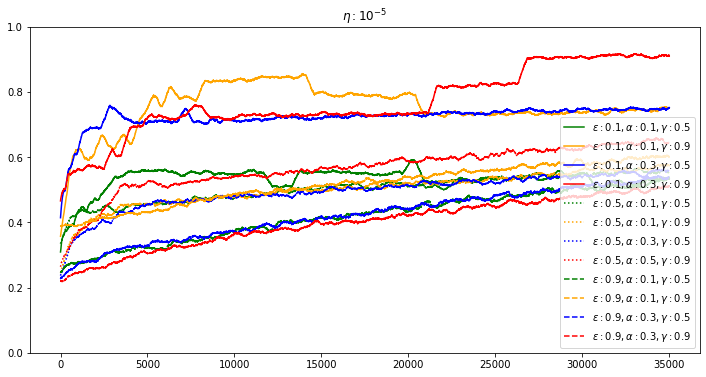

In [130]:
plt.figure(figsize=[12,6])
K = 35000
X = np.arange(K)
plt.title(r'$\eta:10^{-5}$')
plt.plot(X, qt00001_010105_avg[0:K], color='green', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt00001_010109_avg[0:K], color='orange', label = r'$\epsilon:0.1, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt00001_010305_avg[0:K], color='blue', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt00001_010309_avg[0:K], color='red', label = r'$\epsilon:0.1, \alpha:0.3, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt00001_050105_avg[0:K], linestyle=':', color='green', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt00001_050109_avg[0:K], linestyle=':', color='orange', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt00001_050305_avg[0:K], linestyle=':', color='blue', label = r'$\epsilon:0.5, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt00001_050309_avg[0:K], linestyle=':', color='red', label = r'$\epsilon:0.5, \alpha:0.5, \gamma:0.9$')

#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt00001_090105_avg[0:K], linestyle='--', color='green', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt00001_090109_avg[0:K], linestyle='--', color='orange', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt00001_090305_avg[0:K], linestyle='--', color='blue', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt00001_090309_avg[0:K], linestyle='--', color='red', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.9$')

plt.ylim((0,1))
plt.legend()
plt.show()

The best are 

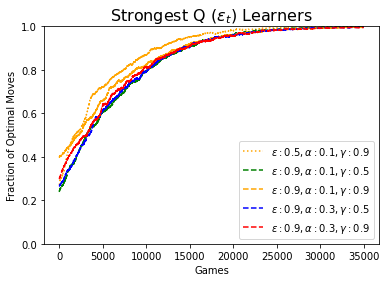

In [143]:
#plt.figure(figsize=[12,6])
K = 35000
X = np.arange(K)
plt.title(r'Strongest Q $(\epsilon_t$) Learners', fontsize=16)

plt.plot(X, qt0001_050109_avg[0:K], linestyle=':', color='orange', label = r'$\epsilon:0.5, \alpha:0.1, \gamma:0.9$')


#plt.ylim((0,1))
#plt.legend()
#plt.show()

#plt.figure(figsize=[12,6])

plt.plot(X, qt0001_090105_avg[0:K], linestyle='--', color='green', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.5$')
plt.plot(X, qt0001_090109_avg[0:K], linestyle='--', color='orange', label = r'$\epsilon:0.9, \alpha:0.1, \gamma:0.9$')
plt.plot(X, qt0001_090305_avg[0:K], linestyle='--', color='blue', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.5$')
plt.plot(X, qt0001_090309_avg[0:K], linestyle='--', color='red', label = r'$\epsilon:0.9, \alpha:0.3, \gamma:0.9$')

plt.xlabel('Games')
plt.ylabel('Fraction of Optimal Moves')
plt.ylim((0,1))
plt.legend()
plt.show()

## Bayes Agent

In [132]:
b01 = pd.read_csv('../final/Bayes/Bayes_optimal_moves0.1vSelfAll_2020_12_04.csv', header=None, names=np.arange(20000))
b05 = pd.read_csv('../final/Bayes/Bayes_optimal_moves0.5vSelfAll_2020_12_05.csv', header=None, names=np.arange(20000))
b09 = pd.read_csv('../final/Bayes/Bayes_optimal_moves0.9vSelfAll_2020_12_05.csv', header=None, names=np.arange(20000))
b099 = pd.read_csv('../final/Bayes/Bayes_optimal_moves0.99vSelfAll_2020_12_05.csv', header=None, names=np.arange(20000))

In [133]:
N = 100
b01_avg = flatten_and_smooth(b01, N)
b05_avg = flatten_and_smooth(b05, N)
b09_avg = flatten_and_smooth(b09, N)
b099_avg = flatten_and_smooth(b099, N)

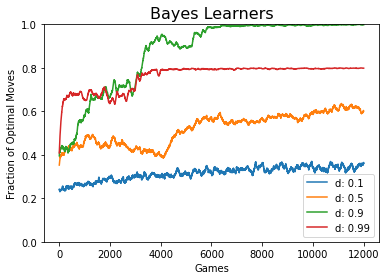

In [145]:
K = 12000
X = np.arange(K)

plt.title('Bayes Learners', fontsize=16)
plt.xlabel('Games')
plt.ylabel('Fraction of Optimal Moves')
plt.plot(X, b01_avg[0:K], label = r'd: 0.1')
plt.plot(X, b05_avg[0:K], label = r'd: 0.5')
plt.plot(X, b09_avg[0:K], label = r'd: 0.9')
plt.plot(X, b099_avg[0:K], label = r'd: 0.99')


plt.ylim((0,1))
plt.legend()
plt.show()

# Visualizing Bayes Agent Parameters

Recal $V \sim N(\mu, \tau^{-1})$, $\mu \sim N(m, \nu^{-1})$, $\tau \sim \text{Gamma}(a,b)$

In [4]:
N = 2000
aggressive_m = pd.read_csv('../final/Bayes_vis/aggressive_mu_series.csv')
aggressive_nu = pd.read_csv('../final/Bayes_vis/aggressive_lamb_series.csv')
aggressive_alpha = pd.read_csv('../final/Bayes_vis/aggressive_alpha_series.csv')
aggressive_beta = pd.read_csv('../final/Bayes_vis/aggressive_beta_series.csv')

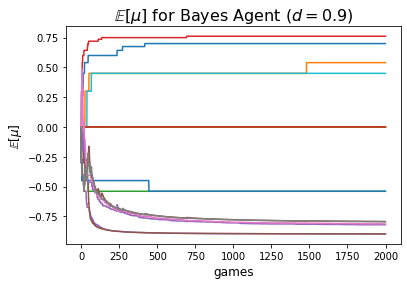

In [16]:
aggressive_m.head(N).plot(legend=False)
plt.ylabel(r'$\mathbb{E}[\mu]$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$\mathbb{E}[\mu]$ for Bayes Agent ($d=0.9$)', fontsize=16)
plt.show()

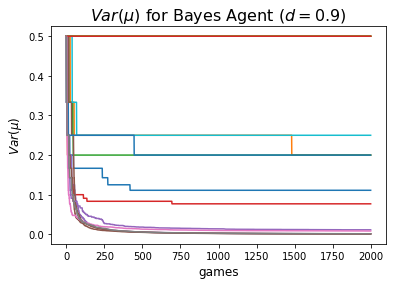

In [17]:
var_mu = 1/aggressive_nu.head(N)
var_mu.plot(legend=False)
plt.ylabel(r'$Var(\mu)$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$Var(\mu)$ for Bayes Agent ($d=0.9$)',fontsize=16)
plt.show()

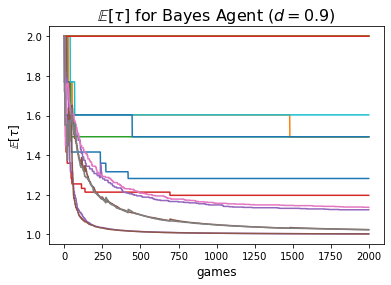

In [18]:
aggr_tau_mean = aggressive_beta.head(N)/aggressive_alpha.head(N)
aggr_tau_mean.plot(legend=False)

plt.ylabel(r'$\mathbb{E}[\tau]$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$\mathbb{E}[\tau]$ for Bayes Agent ($d=0.9$)',fontsize=16)
plt.show()

In [8]:
cons_m = pd.read_csv('../final/Bayes_vis/conservative_mu_series.csv')
cons_nu = pd.read_csv('../final/Bayes_vis/conservative_lamb_series.csv')
cons_alpha = pd.read_csv('../final/Bayes_vis/conservative_alpha_series.csv')
cons_beta = pd.read_csv('../final/Bayes_vis/conservative_beta_series.csv')

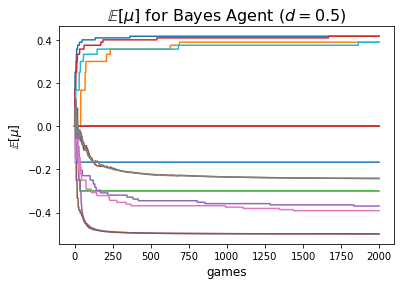

In [19]:
cons_m.head(N).plot(legend=False)
plt.ylabel(r'$\mathbb{E}[\mu]$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$\mathbb{E}[\mu]$ for Bayes Agent ($d=0.5$)',fontsize=16)

plt.show()

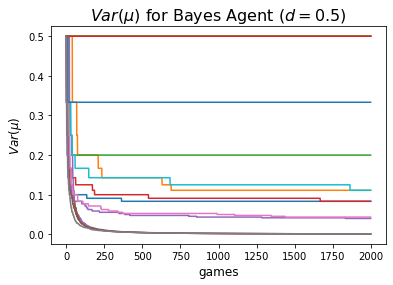

In [20]:
var_mu = 1/cons_nu.head(N)
var_mu.plot(legend=False)
plt.ylabel(r'$Var(\mu)$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$Var(\mu)$ for Bayes Agent ($d=0.5$)',fontsize=16)
plt.show()

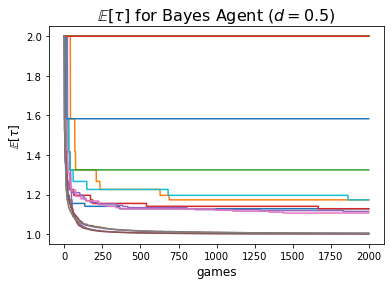

In [21]:
cons_tau_mean = cons_beta.head(N)/cons_alpha.head(N)
cons_tau_mean.plot(legend=False)
plt.ylabel(r'$\mathbb{E}[\tau]$',fontsize=12)
plt.xlabel('games',fontsize=12)
plt.title(r'$\mathbb{E}[\tau]$ for Bayes Agent ($d=0.5$)',fontsize=16)
plt.show()